In [1]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import warnings
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE



In [3]:
description= pd.read_csv('archive/description.csv')
diets= pd.read_csv('archive/diets.csv')

medications= pd.read_csv('archive/medications.csv')
precautions= pd.read_csv('archive/precautions_df.csv', index_col= 0)
Symptom_severity_df= pd.read_csv('archive/Symptom-severity.csv')

sym_des= pd.read_csv('archive/symtoms_df.csv', index_col= 0)


df= pd.read_csv('archive/Training.csv')
workout=pd.read_csv('archive/workout_df.csv').iloc[:, 2:]

workout.head()


,disease,workout
0,Fungal infection,Avoid sugary foods
1,Fungal infection,Consume probiotics
2,Fungal infection,Increase intake of garlic
3,Fungal infection,Include yogurt in diet
4,Fungal infection,Limit processed foods


In [38]:
# Eliminating all NaN from the dataset

sym_des.dropna(inplace= True)
precautions.dropna(inplace= True)

print("precautions Dataframe\n", precautions.isna().sum())
print("\nSymptons Dataframe\n", sym_des.isna().sum())


precautions Dataframe
 Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    0
Precaution_4    0
dtype: int64

Symptons Dataframe
 Disease      0
Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
dtype: int64


In [242]:
X = df.drop('prognosis' ,axis=1)
y = df['prognosis']


In [243]:
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)


In [244]:
# split the data 
X_test,X_train,y_test,y_train = train_test_split(X,Y,test_size =0.2 , random_state=42)

In [245]:
X_test.shape,X_train.shape,y_test.shape,y_train.shape


((3936, 132), (984, 132), (3936,), (984,))

In [246]:
# Here we can train the top best models which can give best accuracy So i can create a Dictionary of models to check which model is more accurate.
models = {
      'SVC' : SVC(kernel='linear'),
      'Random Forest' :RandomForestClassifier(random_state=42,n_estimators=100),
      'KNeighbors' : KNeighborsClassifier(n_neighbors=5),
      'Gradient Boosting': GradientBoostingClassifier(random_state=42,n_estimators=100),
      'MultinomialNB' :MultinomialNB() 
}
for model_name , model in models.items():
    # Train model
    model.fit(X_train,y_train)
    # test model
    predictions = model.predict(X_test)
    # calculate accuracy
    accuracy = accuracy_score(y_test,predictions)
    # calculate confusion matrix
    cm = confusion_matrix(y_test,predictions)
    # print results
    print(f"{model_name} accuracy : {accuracy}")
    print(f"{model_name} confusion matrix :")
    print(np.array2string(cm,separator=', '))

SVC accuracy : 1.0
SVC confusion matrix :
[[102,   0,   0, ...,   0,   0,   0],
 [  0,  90,   0, ...,   0,   0,   0],
 [  0,   0,  96, ...,   0,   0,   0],
 ...,
 [  0,   0,   0, ...,  94,   0,   0],
 [  0,   0,   0, ...,   0,  98,   0],
 [  0,   0,   0, ...,   0,   0,  86]]
Random Forest accuracy : 1.0
Random Forest confusion matrix :
[[102,   0,   0, ...,   0,   0,   0],
 [  0,  90,   0, ...,   0,   0,   0],
 [  0,   0,  96, ...,   0,   0,   0],
 ...,
 [  0,   0,   0, ...,  94,   0,   0],
 [  0,   0,   0, ...,   0,  98,   0],
 [  0,   0,   0, ...,   0,   0,  86]]
KNeighbors accuracy : 1.0
KNeighbors confusion matrix :
[[102,   0,   0, ...,   0,   0,   0],
 [  0,  90,   0, ...,   0,   0,   0],
 [  0,   0,  96, ...,   0,   0,   0],
 ...,
 [  0,   0,   0, ...,  94,   0,   0],
 [  0,   0,   0, ...,   0,  98,   0],
 [  0,   0,   0, ...,   0,   0,  86]]
Gradient Boosting accuracy : 0.9801829268292683
Gradient Boosting confusion matrix :
[[102,   0,   0, ...,   0,   0,   0],
 [  0,  90,   0

In [247]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_pred,y_test)
acc

1.0

In [248]:
# Path to save the model
path = 'archive/working_1//svc.pkl'
# Ensure the directory exists
os.makedirs(os.path.dirname(path), exist_ok=True)

# Save the model
with open(path, 'wb') as file:
    pickle.dump(svc, file)

In [249]:
# load the data-set
svc = pickle.load(open(path,'rb'))

In [250]:
# 2d array convert
X_test.iloc[0].values.reshape(1,-1)


array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [251]:
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)

# Fit RFE
rfe.fit(X_train, y_train)

# Get feature rankings
feature_importances = rfe.ranking_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Rank': feature_importances
})

# Sort the DataFrame by importance (lower ranking means more important)
features_df = features_df.sort_values(by='Rank')

print("Most Influential Variables:")

features_df.head()

Most Influential Variables:


,Feature,Rank
11,vomiting,1
14,fatigue,2
25,high_fever,3
56,chest_pain,4
32,yellowish_skin,5


In [252]:
# now take a pred on this 2d array to check that our model pred correctly or not

# test 1 :
print('Model Predictions :',svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print('Actual Labels :', y_test[0])

Model Predictions : [8]
Actual Labels : 8


In [253]:
# test 2 :
print('Model Predictions :',svc.predict(X_test.iloc[40].values.reshape(1,-1)))
print('Actual Labels :', y_test[40])

Model Predictions : [27]
Actual Labels : 27


In [254]:
confusion = confusion_matrix(y_test, predictions)
print(confusion)

[[102   0   0 ...   0   0   0]
 [  0  90   0 ...   0   0   0]
 [  0   0  96 ...   0   0   0]
 ...
 [  0   0   0 ...  94   0   0]
 [  0   0   0 ...   0  98   0]
 [  0   0   0 ...   0   0  86]]


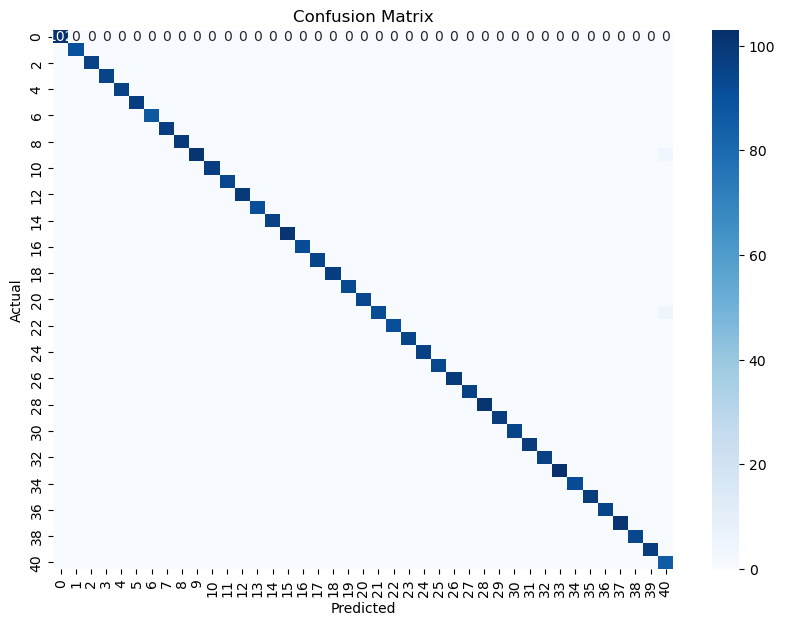

In [255]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [256]:
classification = classification_report(y_test, predictions)
print(classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        95
           4       1.00      1.00      1.00        96
           5       1.00      1.00      1.00        97
           6       1.00      1.00      1.00        87
           7       1.00      1.00      1.00        97
           8       1.00      1.00      1.00        99
           9       1.00      0.96      0.98       105
          10       1.00      1.00      1.00        97
          11       1.00      1.00      1.00        94
          12       1.00      1.00      1.00        99
          13       1.00      1.00      1.00        91
          14       1.00      1.00      1.00        96
          15       1.00      1.00      1.00       101
          16       1.00      1.00      1.00        92
          17       1.00    

In [257]:
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 1.0


In [258]:
print(y_test)

[ 8 37 19 ... 11 15 14]


In [259]:
def helper(dis): # this funtion can give us the symptoms Description,Precautions,Medication,Diet plan,workout 
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

# here i create a dictonary 1- symptoms and list 1- diseases because we transform our data in lobelEncoder (0,1) but the patient or user can not understand that which number represented the disease or symptom 

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def given_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [260]:
symptoms = input("Enter your symptoms.......")
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
# Remove any extra characters, if any
predicted_disease = given_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

=================predicted disease============
GERD
=================description==================
GERD (Gastroesophageal Reflux Disease) is a digestive disorder that affects the lower esophageal sphincter.
=================precautions==================
1 :  avoid fatty spicy food
2 :  avoid lying down after eating
3 :  maintain healthy weight
4 :  exercise
=================medications==================
5 :  ['Proton Pump Inhibitors (PPIs)', 'H2 Blockers', 'Antacids', 'Prokinetics', 'Antibiotics']
=================workout==================
6 :  Consume smaller meals
7 :  Avoid trigger foods (spicy, fatty)
8 :  Eat high-fiber foods
9 :  Limit caffeine and alcohol
10 :  Chew food thoroughly
11 :  Avoid late-night eating
12 :  Consume non-citrus fruits
13 :  Include lean proteins
14 :  Stay hydrated
15 :  Avoid carbonated beverages
=================diets==================
16 :  ['Low-Acid Diet', 'Fiber-rich foods', 'Ginger', 'Licorice', 'Aloe vera juice']


In [261]:
## Finding difference in importances across random states
## Need to create this for later
all_importances_df = pd.DataFrame()
for i in range(1, 10):
    rf_model = RandomForestClassifier(n_estimators=500, random_state=i)
    rf_model = rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_feature_importances = rf_model.feature_importances_

    iteration_df = pd.DataFrame({
        'Feature': X_train.columns,
        f'Importance_{i}': rf_feature_importances
    })
    
    ##Set up if condition for first iteration
    if all_importances_df.empty:
        all_importances_df = iteration_df

    else:
        all_importances_df = pd.merge(all_importances_df, iteration_df, on='Feature', how='outer')
print("Most Influential Variables:")
print(all_importances_df)

Most Influential Variables:
                  Feature  Importance_1  Importance_2  Importance_3  \
0                 itching      0.011236      0.012595      0.011014   
1               skin_rash      0.008520      0.008211      0.007916   
2    nodal_skin_eruptions      0.006687      0.006276      0.006471   
3     continuous_sneezing      0.010537      0.011488      0.009505   
4               shivering      0.003877      0.003580      0.004481   
..                    ...           ...           ...           ...   
127  small_dents_in_nails      0.007310      0.007878      0.006338   
128    inflammatory_nails      0.004943      0.004693      0.005427   
129               blister      0.007476      0.006866      0.006006   
130  red_sore_around_nose      0.009041      0.009601      0.009933   
131     yellow_crust_ooze      0.006763      0.006974      0.006549   

     Importance_4  Importance_5  Importance_6  Importance_7  Importance_8  \
0        0.010874      0.012229      0.012

In [262]:
## Analysis: How much does the importance of each feature vary across the different random states?
analysis_all_importances_df = pd.DataFrame()
analysis_all_importances_df['Mean'] = all_importances_df.iloc[:, 1:].mean(axis=1)
analysis_all_importances_df['Median'] = all_importances_df.iloc[:, 1:].median(axis=1)
analysis_all_importances_df['Min'] = all_importances_df.iloc[:, 1:].min(axis=1)
analysis_all_importances_df['Max'] = all_importances_df.iloc[:, 1:].max(axis=1)
analysis_all_importances_df['Std'] = all_importances_df.iloc[:, 1:].std(axis=1)


In [263]:
analysis_all_importances_df['Std'].describe()

count    132.000000
mean       0.000465
std        0.000166
min        0.000000
25%        0.000343
50%        0.000460
75%        0.000575
max        0.000893
Name: Std, dtype: float64

In [264]:
features_rf_df = all_importances_df[['Feature', 'Importance_1']].copy()
features_rf_df.rename(columns={'Importance_1': 'Importance'}, inplace=True)

print(features_rf_df)

                  Feature  Importance
0                 itching    0.011236
1               skin_rash    0.008520
2    nodal_skin_eruptions    0.006687
3     continuous_sneezing    0.010537
4               shivering    0.003877
..                    ...         ...
127  small_dents_in_nails    0.007310
128    inflammatory_nails    0.004943
129               blister    0.007476
130  red_sore_around_nose    0.009041
131     yellow_crust_ooze    0.006763

[132 rows x 2 columns]


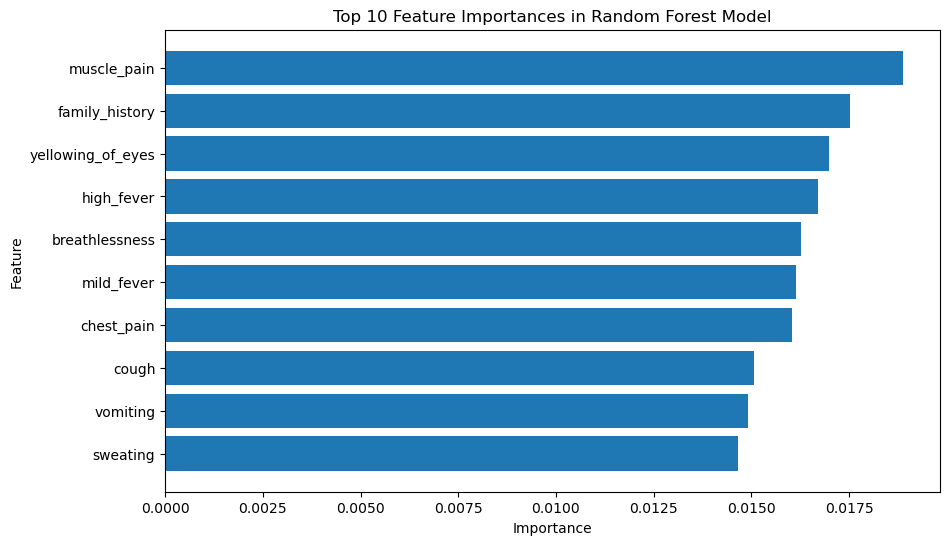

In [265]:
features_rf_df = features_rf_df.sort_values(by='Importance', ascending=False)

top_rf_features = features_rf_df.head(10)


plt.figure(figsize=(10, 6))
plt.barh(top_rf_features['Feature'], top_rf_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [266]:
features_rf_ranked = features_rf_df.copy()
features_rf_ranked['RF Rank'] = features_rf_ranked['Importance'].rank(ascending=False)
features_rf_ranked.drop('Importance', axis=1, inplace=True)
features_rf_ranked.head()

,Feature,RF Rank
97,muscle_pain,1.0
106,family_history,2.0
43,yellowing_of_eyes,3.0
25,high_fever,4.0
27,breathlessness,5.0


In [267]:
accuracy_rf = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy_rf)

Overall Accuracy: 1.0


In [268]:
classification_rf = classification_report(y_test, y_pred)
print(classification_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        96
           3       1.00      1.00      1.00        95
           4       1.00      1.00      1.00        96
           5       1.00      1.00      1.00        97
           6       1.00      1.00      1.00        87
           7       1.00      1.00      1.00        97
           8       1.00      1.00      1.00        99
           9       1.00      1.00      1.00       105
          10       1.00      1.00      1.00        97
          11       1.00      1.00      1.00        94
          12       1.00      1.00      1.00        99
          13       1.00      1.00      1.00        91
          14       1.00      1.00      1.00        96
          15       1.00      1.00      1.00       101
          16       1.00      1.00      1.00        92
          17       1.00    

In [269]:
conf_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_rf)

Confusion Matrix:
[[102   0   0 ...   0   0   0]
 [  0  90   0 ...   0   0   0]
 [  0   0  96 ...   0   0   0]
 ...
 [  0   0   0 ...  94   0   0]
 [  0   0   0 ...   0  98   0]
 [  0   0   0 ...   0   0  86]]


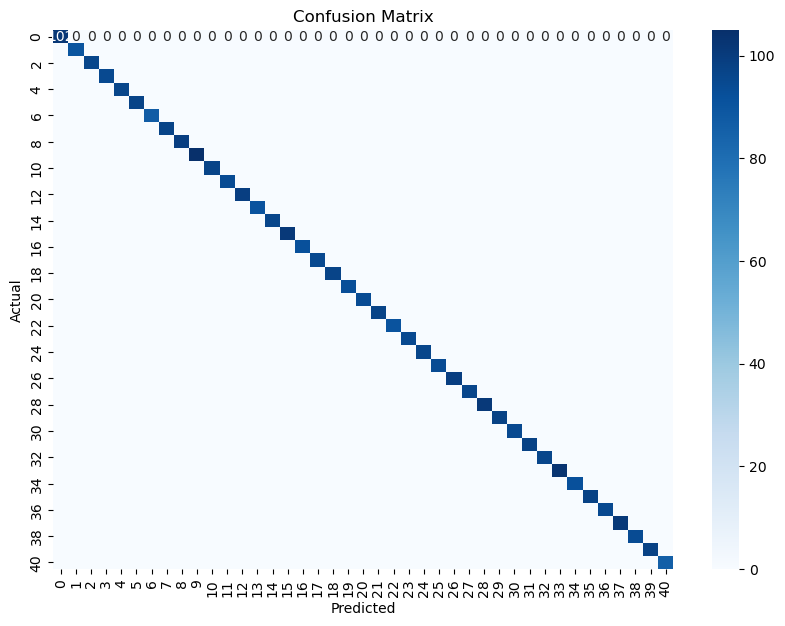

In [270]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [277]:
merged_df = pd.merge(features_df, features_rf_ranked, on="Feature", suffixes=('_RFE', '_RF'))
merged_df['Rank_Difference'] = (merged_df['Rank'] - merged_df['RF Rank']).abs()

merged_df.head()

,Feature,Rank,RF Rank,Rank_Difference
0,vomiting,1,9.0,8.0
1,fatigue,2,15.0,13.0
2,high_fever,3,4.0,1.0
3,chest_pain,4,7.0,3.0
4,yellowish_skin,5,22.0,17.0


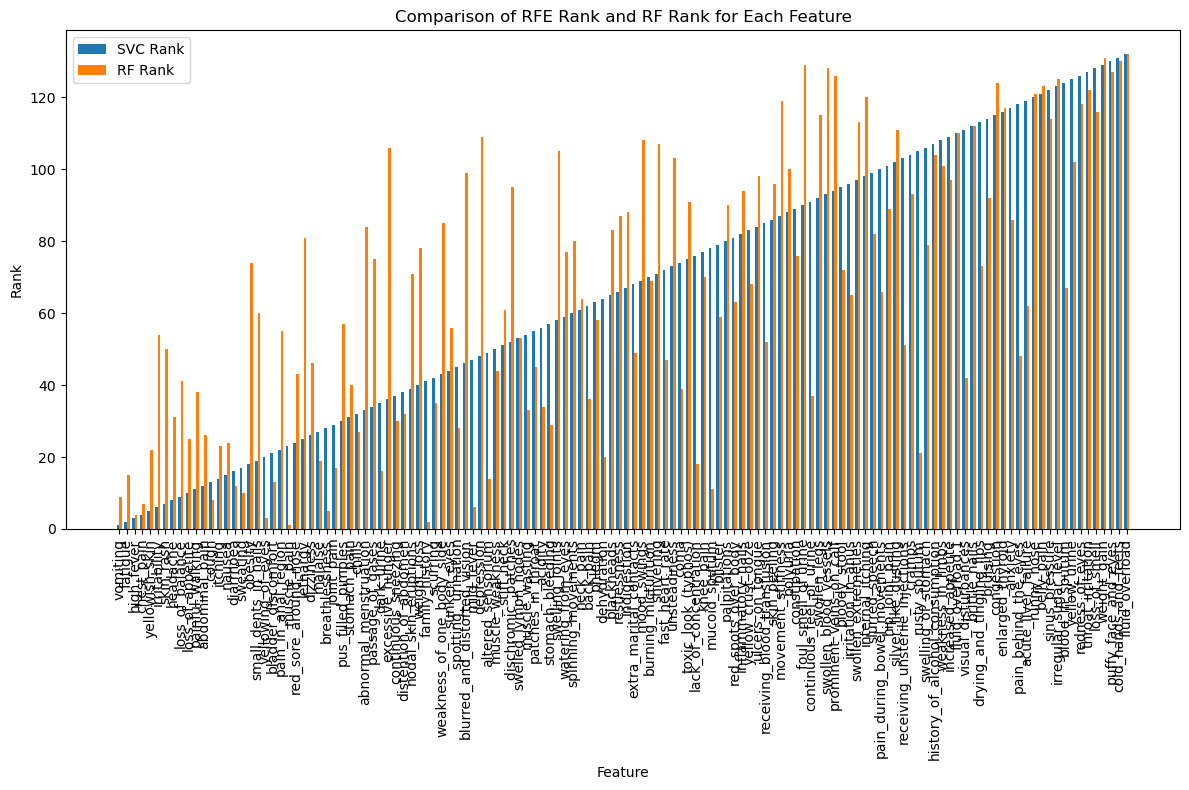

In [278]:
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(merged_df))

# Plot RFE ranks
plt.bar(index, merged_df['Rank'], bar_width, label='SVC Rank')

# Plot RF ranks
plt.bar([i + bar_width for i in index], merged_df['RF Rank'], bar_width, label='RF Rank')

plt.xlabel('Feature')
plt.ylabel('Rank')
plt.title('Comparison of RFE Rank and RF Rank for Each Feature')
plt.xticks([i + bar_width / 2 for i in index], merged_df['Feature'], rotation=90)
plt.legend()


plt.tight_layout()
plt.show()

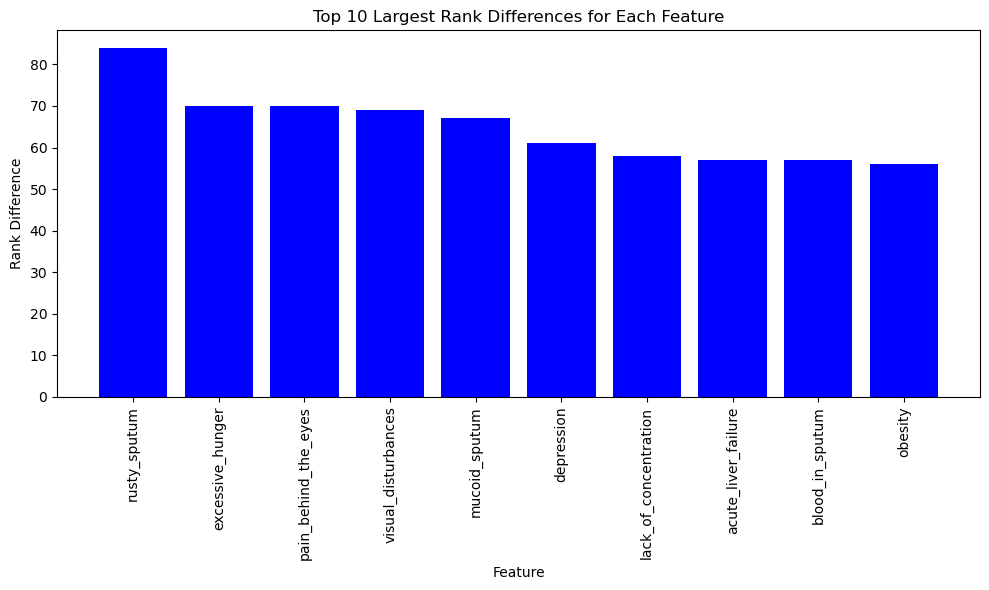

In [280]:
merged_df['Rank_Difference'] = (merged_df['Rank'] - merged_df['RF Rank']).abs()

top_10_df = merged_df.nlargest(10, 'Rank_Difference')

plt.figure(figsize=(10, 6))
plt.bar(top_10_df['Feature'], top_10_df['Rank_Difference'], color='blue')

plt.xlabel('Feature')
plt.ylabel('Rank Difference')
plt.title('Top 10 Largest Rank Differences for Each Feature')
plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()